## Series

In [52]:
import numpy as np
import pandas as pd
exam1 = [89,85,93,83]
labels  = ['Student A', 'Student B', 'Student C', 'Student D']

pd.Series(exam1,labels)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [53]:
pd.Series(exam1,labels)['Student D']

np.int64(83)

In [54]:
d = {s:p for s,p in zip(labels,exam1)}
d

{'Student A': 89, 'Student B': 85, 'Student C': 93, 'Student D': 83}

In [55]:
pd.Series(d)

Student A    89
Student B    85
Student C    93
Student D    83
dtype: int64

In [56]:
exam2 = [74,56,44,92]

e1 = pd.Series(exam1,labels)
e2 = pd.Series(exam2,labels)

In [57]:
e1 + e2

Student A    163
Student B    141
Student C    137
Student D    175
dtype: int64

In [58]:
e1 * e2

Student A    6586
Student B    4760
Student C    4092
Student D    7636
dtype: int64

In [59]:
e1 / 5

Student A    17.8
Student B    17.0
Student C    18.6
Student D    16.6
dtype: float64

## DataFrame

In [60]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
df = pd.DataFrame({'e1':exam1, 'e2':exam2},index=labels)
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [61]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [62]:
type(df['e1'])

pandas.core.series.Series

In [63]:
data = np.array([exam1,exam2])
data.transpose()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [64]:
df = pd.DataFrame(data.transpose(),index=labels,columns=['e1','e2'])
df

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [65]:
df.to_numpy()

array([[89, 74],
       [85, 56],
       [93, 44],
       [83, 92]])

In [66]:
df.shape

(4, 2)

In [67]:
df['e1']

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [68]:
df.e1

Student A    89
Student B    85
Student C    93
Student D    83
Name: e1, dtype: int64

In [69]:
df['e3'] = [67,59,79,84]
df

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [70]:
df['semester1'] = df['e1'] + df['e2'] + df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [71]:
df[['e1','e2']]

,e1,e2
Student A,89,74
Student B,85,56
Student C,93,44
Student D,83,92


In [72]:
df.loc['Student C']

e1            93
e2            44
e3            79
semester1    216
Name: Student C, dtype: int64

In [73]:
df.loc['Student C','e2']

np.int64(44)

In [74]:
df.loc[['Student C','Student D'],['e2']]

,e2
Student C,44
Student D,92


In [75]:
df.iloc[1]

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [76]:
df.iloc[1:,1]

Student B    56
Student C    44
Student D    92
Name: e2, dtype: int64

## Masking na podstawie wyrażeń logicznych

In [77]:
df['e2'] > 70

Student A     True
Student B    False
Student C    False
Student D     True
Name: e2, dtype: bool

In [78]:
df[df['e2'] > 70]

,e1,e2,e3,semester1
Student A,89,74,67,230
Student D,83,92,84,259


In [79]:
df[(df['e2']<50)|(df['e2']>90)]

,e1,e2,e3,semester1
Student C,93,44,79,216
Student D,83,92,84,259


## Podstawowe operacje

In [80]:
df.drop('semester1',axis=1)

,e1,e2,e3
Student A,89,74,67
Student B,85,56,59
Student C,93,44,79
Student D,83,92,84


In [81]:
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [82]:
#df.drop(['e3','semester1'],axis=1,inplace=True)
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [83]:
#df.drop('Student B',inplace=True)
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [84]:
df.reset_index() # jeśli chcemy zachować zmiany, musimy użyć parametru inplace

,index,e1,e2,e3,semester1
0,Student A,89,74,67,230
1,Student B,85,56,59,200
2,Student C,93,44,79,216
3,Student D,83,92,84,259


In [85]:
df_new_index = df.reset_index()
df_new_index

,index,e1,e2,e3,semester1
0,Student A,89,74,67,230
1,Student B,85,56,59,200
2,Student C,93,44,79,216
3,Student D,83,92,84,259


In [87]:
df_new_index['student_name'] = ['Adrian','Bartłomiej','Celina','Dagmara']
df_new_index

,index,e1,e2,e3,semester1,student_name
0,Student A,89,74,67,230,Adrian
1,Student B,85,56,59,200,Bartłomiej
2,Student C,93,44,79,216,Celina
3,Student D,83,92,84,259,Dagmara


In [88]:
df_new_index.set_index('student_name')

,index,e1,e2,e3,semester1
student_name,,,,,
Adrian,Student A,89,74,67,230
Bartłomiej,Student B,85,56,59,200
Celina,Student C,93,44,79,216
Dagmara,Student D,83,92,84,259


In [89]:
df_new_index2 = df.reset_index()
df_new_index2

,index,e1,e2,e3,semester1
0,Student A,89,74,67,230
1,Student B,85,56,59,200
2,Student C,93,44,79,216
3,Student D,83,92,84,259


In [90]:
df_new_index2.index = ['Adrian','Bartłomiej','Celina','Dagmara']
df_new_index2

,index,e1,e2,e3,semester1
Adrian,Student A,89,74,67,230
Bartłomiej,Student B,85,56,59,200
Celina,Student C,93,44,79,216
Dagmara,Student D,83,92,84,259


## Funkcja rename – zmiana etykiet kolumn i wierszy

In [91]:
df.rename(columns={'e1':'exam1','e2':'exam2','e3':'exam3'})

,exam1,exam2,exam3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [92]:
df.rename(index={'Studnet C':'Student C'})

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [94]:
df.rename(str.upper, axis='columns')
#df.rename(str.upper, axis=1)

,E1,E2,E3,SEMESTER1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


## Unique, value_counts, sort_values, drop_duplicates

In [97]:
df = pd.DataFrame({'A':[100,44,56,99,85,100],
                  'B':['Panda','Snake','Snake','Rat','Dog','Panda']})
df

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog
5,100,Panda


In [98]:
df['B'].unique()

array(['Panda', 'Snake', 'Rat', 'Dog'], dtype=object)

In [99]:
df['B'].nunique()

4

In [100]:
df['B'].value_counts()

B
Panda    2
Snake    2
Rat      1
Dog      1
Name: count, dtype: int64

In [101]:
df['B'].value_counts(normalize=True)

B
Panda    0.333333
Snake    0.333333
Rat      0.166667
Dog      0.166667
Name: proportion, dtype: float64

In [102]:
df.sort_values(by='A')

,A,B
1,44,Snake
2,56,Snake
4,85,Dog
3,99,Rat
0,100,Panda
5,100,Panda


In [103]:
df.sort_values(by='A',ascending=False)

,A,B
0,100,Panda
5,100,Panda
3,99,Rat
4,85,Dog
2,56,Snake
1,44,Snake


In [104]:
df.drop_duplicates()

,A,B
0,100,Panda
1,44,Snake
2,56,Snake
3,99,Rat
4,85,Dog


## MultiIndex

In [107]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3=[67,59,79,84]
labels  = ['Student A', 'Student B', 'Student C', 'Student D']
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [108]:
schools = ['High School X','High School X','High School Y','High School Y']
multi_index_list = [(school,student) for school,student in zip(schools,df.index)]
multi_index_list

[('High School X', 'Student A'),
 ('High School X', 'Student B'),
 ('High School Y', 'Student C'),
 ('High School Y', 'Student D')]

In [109]:
df.index = pd.MultiIndex.from_tuples(multi_index_list,names=['School','Student'])
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [112]:
exam1 = [89,85,93,83]
exam2 = [74,56,44,92]
exam3=[67,59,79,84]
labels  = ['Student A', 'Student B', 'Student C', 'Student D']
df = pd.DataFrame({'e1':exam1, 'e2':exam2, 'e3':exam3}, index=labels)
df['semester1'] = df['e1']+df['e2']+df['e3']
df

,e1,e2,e3,semester1
Student A,89,74,67,230
Student B,85,56,59,200
Student C,93,44,79,216
Student D,83,92,84,259


In [113]:
df.set_index([pd.Index(['High School X','High School X','High School Y','High School Y']), df.index],inplace=True)
df

e1  e2  e3  semester1
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [114]:
df.index.names = ['School','Student']
df

e1  e2  e3  semester1
School        Student                         
High School X Student A  89  74  67        230
              Student B  85  56  59        200
High School Y Student C  93  44  79        216
              Student D  83  92  84        259

In [115]:
df.loc['High School X']

,e1,e2,e3,semester1
Student,,,,
Student A,89,74,67,230
Student B,85,56,59,200


In [116]:
df.loc['High School X'].iloc[1]

e1            85
e2            56
e3            59
semester1    200
Name: Student B, dtype: int64

In [117]:
df.xs('High School Y')

,e1,e2,e3,semester1
Student,,,,
Student C,93,44,79,216
Student D,83,92,84,259


In [118]:
df.xs(('High School Y','Student D'))

e1            83
e2            92
e3            84
semester1    259
Name: (High School Y, Student D), dtype: int64

In [119]:
df.xs('Student D',level='Student')

,e1,e2,e3,semester1
School,,,,
High School Y,83,92,84,259


## Groupby

In [120]:
df = pd.DataFrame({'Category':['Games','Games','Games',

                               'Film&Video','Film&Video','Film&Video'],

                  'Project_Title':['The Last Faith','Magic Puzzles','Dinosaur Fossil Hunter',

                                   'Beyond Your Eyes','5150','8-Bit Wars'],

                  'Pledged':[92774,2873519,7962,

                             276,23963,6950],

                  'Country':['UK','USA','Poland',

                             'Bulgaria','USA','UK'],

                  'Date_Start':['2020-03-21','2020-03-11','2020-04-16',

                                '2020-02-09','2020-04-10','2020-03-19']})

In [121]:
df.groupby('Category')

In [122]:
df.groupby('Category').sum()

,Project_Title,Pledged,Country,Date_Start
Category,,,,
Film&Video,Beyond Your Eyes51508-Bit Wars,31189,BulgariaUSAUK,2020-02-092020-04-102020-03-19
Games,The Last FaithMagic PuzzlesDinosaur Fossil Hunter,2974255,UKUSAPoland,2020-03-212020-03-112020-04-16


In [135]:
df.groupby('Category').mean(numeric_only=True)

,Pledged
Category,
Film&Video,10396.333333
Games,991418.333333


In [124]:
df.groupby('Category').count()

,Project_Title,Pledged,Country,Date_Start
Category,,,,
Film&Video,3,3,3,3
Games,3,3,3,3


In [126]:
df['Date_Start'] = pd.to_datetime(df['Date_Start'])

In [128]:
df.groupby(pd.Grouper(key='Date_Start',freq='ME')).sum()

,Category,Project_Title,Pledged,Country
Date_Start,,,,
2020-02-29,Film&Video,Beyond Your Eyes,276,Bulgaria
2020-03-31,GamesFilm&VideoGames,Magic Puzzles8-Bit WarsThe Last Faith,2973243,USAUKUK
2020-04-30,Film&VideoGames,5150Dinosaur Fossil Hunter,31925,USAPoland


In [132]:
df.groupby(pd.Grouper(key='Date_Start',freq='ME')).agg({'Pledged':'sum','Project_Title':'count'})

,Pledged,Project_Title
Date_Start,,
2020-02-29,276,1
2020-03-31,2973243,3
2020-04-30,31925,2


In [136]:
df.groupby(['Country', 'Category']).sum(numeric_only=True)
# df.groupby(['Country', 'Category'])['Pledged'].sum()

Pledged
Country  Category           
Bulgaria Film&Video      276
Poland   Games          7962
UK       Film&Video     6950
         Games         92774
USA      Film&Video    23963
         Games       2873519

## Brakujące dane

In [137]:
df_with_nulls = pd.DataFrame({'A':[1,100,np.nan,1000,10000],
                             'B':[2,4,2,4,np.nan],
                             'C':[40,np.nan,20,np.nan,np.nan]})
df_with_nulls

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


In [147]:
print(df_with_nulls.isnull().mean())
print()
print(df_with_nulls.isnull().sum())

A    0.2
B    0.2
C    0.6
dtype: float64

A    1
B    1
C    3
dtype: int64


In [148]:
df_with_nulls[df_with_nulls['C'].isnull()]

,A,B,C
1,100.0,4.0,NaN
3,1000.0,4.0,NaN
4,10000.0,NaN,NaN


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

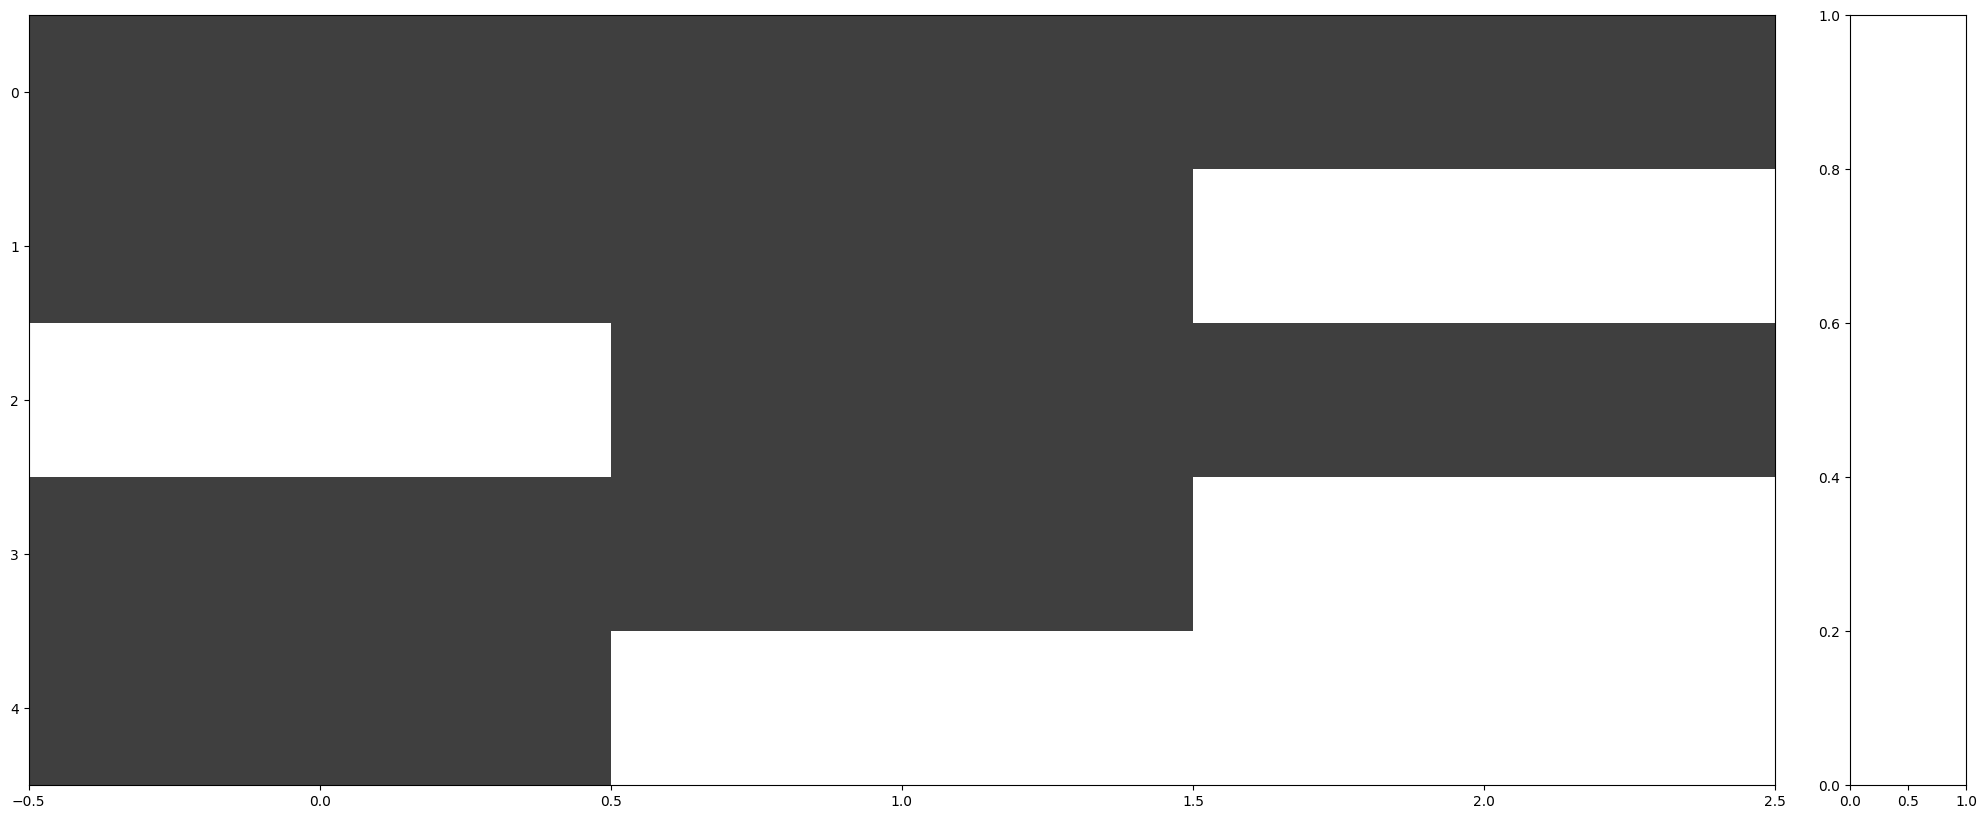

In [149]:
import missingno as msno
msno.matrix(df_with_nulls)

In [150]:
df_with_nulls.dropna()

,A,B,C
0,1.0,2.0,40.0


In [151]:
df_with_nulls.dropna(thresh=2)

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NaN
2,NaN,2.0,20.0
3,1000.0,4.0,NaN


In [152]:
df_with_nulls.dropna(thresh=3,axis=1)

,A,B
0,1.0,2.0
1,100.0,4.0
2,NaN,2.0
3,1000.0,4.0
4,10000.0,NaN


In [153]:
df_with_nulls.fillna('NOWA WARTOŚĆ')

,A,B,C
0,1.0,2.0,40.0
1,100.0,4.0,NOWA WARTOŚĆ
2,NOWA WARTOŚĆ,2.0,20.0
3,1000.0,4.0,NOWA WARTOŚĆ
4,10000.0,NOWA WARTOŚĆ,NOWA WARTOŚĆ


In [154]:
df_with_nulls['B'].fillna(df_with_nulls['B'].mean())

0    2.0
1    4.0
2    2.0
3    4.0
4    3.0
Name: B, dtype: float64

## Merge, Join, Concatenate

In [2]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],

                    'B': ['B0', 'B1', 'B2', 'B3'],

                    'C': ['C0', 'C1', 'C2', 'C3'],

                    'D': ['D0', 'D1', 'D2', 'D3']},

                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],

                    'B': ['B4', 'B5', 'B6', 'B7'],

                    'C': ['C4', 'C5', 'C6', 'C7'],

                    'D': ['D4', 'D5', 'D6', 'D7']},

                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],

                    'B': ['B8', 'B9', 'B10', 'B11'],

                    'C': ['C8', 'C9', 'C10', 'C11'],

                    'D': ['D8', 'D9', 'D10', 'D11']},

                    index=[8, 9, 10, 11])

In [3]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [11]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


In [12]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s],axis=1)

,A,B,C,D,0
0,A0,B0,C0,D0,S1
1,A1,B1,C1,D1,S2
2,A2,B2,C2,D2,S3
3,A3,B3,C3,D3,S4


In [13]:
pd.concat([df1,df2,df3],axis=1,keys=['first','second','third'])

first                second                third               
       A    B    C    D      A    B    C    D     A    B    C    D
0     A0   B0   C0   D0    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
1     A1   B1   C1   D1    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
2     A2   B2   C2   D2    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
3     A3   B3   C3   D3    NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN
4    NaN  NaN  NaN  NaN     A4   B4   C4   D4   NaN  NaN  NaN  NaN
5    NaN  NaN  NaN  NaN     A5   B5   C5   D5   NaN  NaN  NaN  NaN
6    NaN  NaN  NaN  NaN     A6   B6   C6   D6   NaN  NaN  NaN  NaN
7    NaN  NaN  NaN  NaN     A7   B7   C7   D7   NaN  NaN  NaN  NaN
8    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A8   B8   C8   D8
9    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN    A9   B9   C9   D9
10   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A10  B10  C10  D10
11   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   A11  B11  C11  D11

In [14]:
s = pd.Series(['S1','S2','S3','S4'])
pd.concat([df1,s])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,S1
1,NaN,NaN,NaN,NaN,S2
2,NaN,NaN,NaN,NaN,S3
3,NaN,NaN,NaN,NaN,S4


In [17]:
def make_keys(n):
    return [f'key{i}' for i in range(n)]
left = df1.copy()
left['key'] = make_keys(4)
right = df3.copy()
right['key'] = make_keys(4)

In [18]:
left

,A,B,C,D,key
0,A0,B0,C0,D0,key0
1,A1,B1,C1,D1,key1
2,A2,B2,C2,D2,key2
3,A3,B3,C3,D3,key3


In [19]:
right

,A,B,C,D,key
8,A8,B8,C8,D8,key0
9,A9,B9,C9,D9,key1
10,A10,B10,C10,D10,key2
11,A11,B11,C11,D11,key3


In [20]:
pd.merge(left,right,how='inner',on='key')

,A_x,B_x,C_x,D_x,key,A_y,B_y,C_y,D_y
0,A0,B0,C0,D0,key0,A8,B8,C8,D8
1,A1,B1,C1,D1,key1,A9,B9,C9,D9
2,A2,B2,C2,D2,key2,A10,B10,C10,D10
3,A3,B3,C3,D3,key3,A11,B11,C11,D11


In [21]:
new_right = pd.DataFrame({'E': ['E1','E2','E3','E4','E5','E6'],
                          'key': make_keys(6)})
new_right

,E,key
0,E1,key0
1,E2,key1
2,E3,key2
3,E4,key3
4,E5,key4
5,E6,key5


In [22]:
pd.merge(left,new_right,how='inner',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4


In [23]:
pd.merge(left,new_right,how='outer',on='key')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,E1
1,A1,B1,C1,D1,key1,E2
2,A2,B2,C2,D2,key2,E3
3,A3,B3,C3,D3,key3,E4
4,NaN,NaN,NaN,NaN,key4,E5
5,NaN,NaN,NaN,NaN,key5,E6


In [25]:
other = pd.DataFrame({'E':['E1','E2','E3','E4','E5','E6']},index=['B1','B2','B3','B4','B5','B6'])
other

,E
B1,E1
B2,E2
B3,E3
B4,E4
B5,E5
B6,E6


In [26]:
left.join(other,on='B')

,A,B,C,D,key,E
0,A0,B0,C0,D0,key0,NaN
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3


In [27]:
left.join(other,on='B',how='inner')

,A,B,C,D,key,E
1,A1,B1,C1,D1,key1,E1
2,A2,B2,C2,D2,key2,E2
3,A3,B3,C3,D3,key3,E3
